In [19]:
import torch
import torchvision
import torch.nn as nn
import numpy as np
import torch.utils.data as data
import torchvision.transforms as transforms
import torchvision.datasets as dsets
from torch.autograd import Variable

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from __future__ import print_function

## Basic autograd

In [3]:
x = Variable(torch.Tensor([1]), requires_grad=True)
w = Variable(torch.Tensor([2]), requires_grad=True)
b = Variable(torch.Tensor([3]), requires_grad=True)

# Build a computational graph
y = w * x + b

# Compute gradients.
y.backward()

In [4]:
# print out the gradients.
print(x.grad.data)
print(w.grad.data)
print(b.grad.data)


 2
[torch.FloatTensor of size 1]


 1
[torch.FloatTensor of size 1]


 1
[torch.FloatTensor of size 1]



In [5]:
# Sample data for linear model y = w * x +  b
x = Variable(torch.rand(30, 2))
w = Variable(torch.Tensor([2, 3]).view(2, -1))
y = torch.mm(x, w) + 1.0

In [6]:
y[:5]

Variable containing:
 2.3528
 3.6158
 5.4246
 2.3071
 3.9279
[torch.FloatTensor of size 5x1]

In [7]:
linear = nn.Linear(2, 1)
print('w: ', linear.weight.data)
print('b: ',linear.bias.data)

w:  
 0.2457 -0.1264
[torch.FloatTensor of size 1x2]

b:  
-0.6000
[torch.FloatTensor of size 1]



In [8]:
# Build Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

In [9]:
# forward propagation
pred = linear(x)

In [10]:
# compute loss
loss = criterion(pred, y)
print('loss:', loss.data[0])

# backpropagation
loss.backward()

loss: 17.7736873626709


In [11]:
# Gradients
print('dL/dw', linear.weight.grad)
print('dL/db', linear.bias.grad)

dL/dw Variable containing:
-4.0372 -4.8876
[torch.FloatTensor of size 1x2]

dL/db Variable containing:
-8.2402
[torch.FloatTensor of size 1]



In [12]:
# optimization
optimizer.step()

# Print out the loss after optimization.
pred = linear(x)
loss = criterion(pred, y)
print('loss after 1 step optimization: ', loss.data[0])
linear.zero_grad()
loss.backward()

print('w: ', linear.weight.data)
print('b: ', linear.bias.data)

loss after 1 step optimization:  16.70940399169922
w:  
 0.2861 -0.0775
[torch.FloatTensor of size 1x2]

b:  
-0.5176
[torch.FloatTensor of size 1]



## Input pipeline

In [13]:
# Download and construct dataset
train_dataset = dsets.CIFAR10(root='../../data/', 
                              train=True, 
                              transform=transforms.ToTensor(), 
                              download=True)

In [14]:
image, label = train_dataset[0]

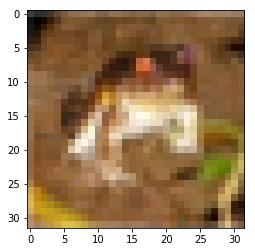

In [21]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    
imshow(image)

In [23]:
print(label)

6


In [25]:
# Data Loader
train_loader = torch.utils.data.DataLoader(train_dataset, 
                                           batch_size=10,
                                           shuffle=True,
                                           num_workers=2)

data_iter = iter(train_loader)

In [27]:
images, labels = data_iter.next()